In [67]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

Text(0, 0.5, 'Water flowing out of the dam (y)')

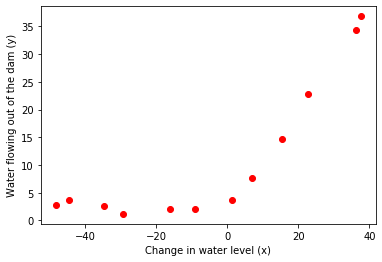

In [12]:
data = loadmat(os.path.join('Data', 'ex5data1.mat' ))
X, y = data['X'], data['y'][:, 0]
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]
Xval,yval = data['Xval'], data['yval'][:, 0]

m = y.size
pyplot.plot(X, y,'ro')
pyplot.xlabel("Change in water level (x)")
pyplot.ylabel("Water flowing out of the dam (y)")

In [44]:
def linearRegCostFunction(X, y , theta, lambda_):
    J = 0
    grad = np.zeros(theta.shape)
    
    J = (1/(2*m))*np.sum(( X.dot(theta) -y )**2) + lambda_/(2*m)*(np.sum( theta[1:]**2 ))
    thetacopy = theta.copy()
    thetacopy[0]= 0 #making the first element zero for biasing
    grad = (1/m)* ( (X.dot(theta))-y ).dot(X) + (lambda_/m)*thetacopy
    
    return J, grad
    
    
    
theta = np.array([1,1])

J, grad = linearRegCostFunction( np.concatenate( [np.ones((m,1)),X ], axis =1), y, theta, 1 )
print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)
print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



In [45]:
grader[1] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (shanislam6@gmail.com)? (Y/n): y
(10, 3)
(3,)
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |   0 /  25 | 
     Regularized Linear Regression Gradient |   0 /  25 | 
                             Learning Curve |   0 /  20 | 
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |   0 / 100 |  



In [46]:
grader[2] = linearRegCostFunction
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (shanislam6@gmail.com)? (Y/n): n
Login (email address): shanislam6@gmail.com
Token: FmjzOA7un6kh5sjm
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |   0 /  25 | 
     Regularized Linear Regression Gradient |   0 /  25 | 
                             Learning Curve |   0 /  20 | 
                 Polynomial Feature Mapping |   0 /  10 | 
                           Validation Curve |   0 /  20 | 
                                  --------------------------------
                                            |   0 / 100 |  



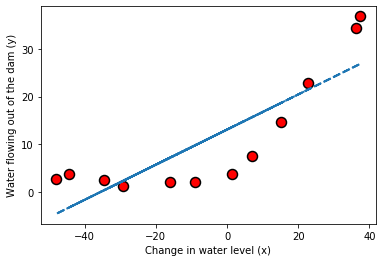

In [53]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = utils.trainLinearReg(linearRegCostFunction, X_aug, y, lambda_=0)

#  Plot fit over the data
pyplot.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')
pyplot.plot(X, np.dot(X_aug, theta), '--', lw=2) #akta graph er i plot. 

(12,)
# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	0.000000
  	2		0.000000	287.202639
  	3		0.000000	305.926858
  	4		0.000000	70.174239
  	5		0.067430	74.470605
  	6		2.119866	72.186302
  	7		7.888022	59.570342
  	8		10.375821	54.178978
  	9		10.518521	53.510958
  	10		15.955905	52.691189
  	11		17.872306	50.060483
  	12		21.130129	50.532842


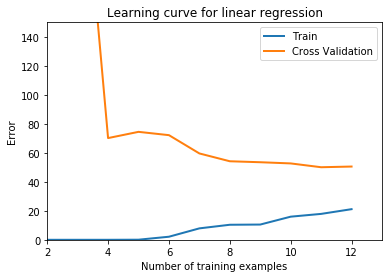

In [95]:
def learningCurve(X, y, Xval, yval, lambda_):
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    
    for i in range(1,m):
        tempY = y[1:i]
        tempX = X[1:i][:]
        takes =  utils.trainLinearReg(linearRegCostFunction, tempX,tempY, lambda_,maxiter=200) #calculating theta for data set i from 1 to m as learned in train and using that theta and storing in error cv
        
        error_train[i],_ = linearRegCostFunction( tempX, tempY, takes, 0 ) #If I dont loop it and calculate it, then error train will contain data from the full set
        error_val[i],_ = linearRegCostFunction( Xval, yval, takes, 0 )
    
    return error_train, error_val

X_aug = np.concatenate( [np.ones((m,1)),X], axis = 1 )
Xval_aug =  np.concatenate( [np.ones((yval.size,1)),Xval], axis = 1 )
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for linear regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([2, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [134]:
def ploy_features(X, p):
    x_1 = X[1]
    for i in range(2, p+1):
        X = np.vstack((X, x_1**i))
    return X

In [135]:
p = 8
X_poly = polyFeatures(X,p) #Aita akta model. Akhon cv, test eu ai model ta dite hobe ar korte hobe
X_poly , mu, sigma = utils.featureNormalize(X_poly) #Feature normalizing my new feature which are x**2, x**3
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1) #Inputing x0=1 in the beginning

#CV
X_poly_Cv = polyFeatures(Xval,p)
#using the same mu, sigma we got in train to see if those really can work good on the new unseen examples
X_poly_Cv -=mu
X_poly_Cv /=sigma
X_poly_Cv = np.concatenate([np.ones((yval.size, 1)), X_poly_Cv], axis=1)


#test
X_poly_test = polyFeatures(Xtest,p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.31160444, -0.67191122,  0.20444378, -0.68694972,
        0.31269222, -0.58676212,  0.34602736, -0.50759683])

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	0.000000
  	2		0.000000	287.202639
  	3		0.000000	276.393463
  	4		0.000000	182.295570
  	5		0.000000	180.395278
  	6		0.000000	111.040543
  	7		0.000000	122.493388
  	8		0.000000	110.635393
  	9		0.000000	110.666273
  	10		0.000023	130.387662
  	11		0.003686	131.487022
  	12		0.022344	127.136890


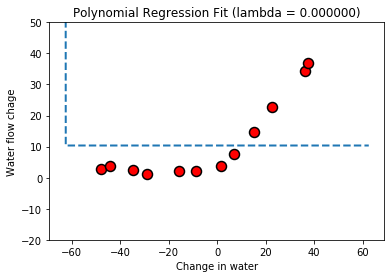

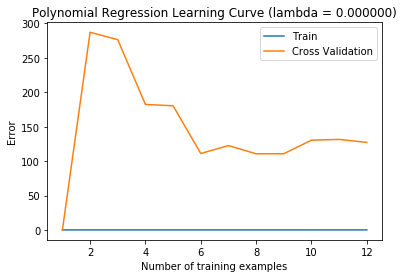

In [206]:
lambda_ = 0
theta = utils.trainLinearReg(linearRegCostFunction, X_poly,y , lambda_ = lambda_,maxiter=55)
pyplot.plot(X, y, 'ro',ms=10, mew=1.5, mec='k')
utils.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)
pyplot.xlabel("Change in water")
pyplot.ylabel("Water flow chage")
pyplot.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
pyplot.ylim([-20, 50])

pyplot.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_Cv, yval, lambda_)
pyplot.plot( np.arange(1,m+1) , error_train, np.arange(1,m+1), error_val)
pyplot.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')

pyplot.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

lambda		Train Error	Validation Error
 0.000000	9.688631	94.011993
 0.001000	10.114675	92.893085
 0.003000	10.249358	93.558041
 0.010000	10.360648	93.965450
 0.030000	10.486492	94.404661
 0.100000	10.714713	95.056204
 0.300000	10.975881	95.285939
 1.000000	11.488319	94.910459
 3.000000	13.473769	94.466450
 10.000000	22.694219	98.383893


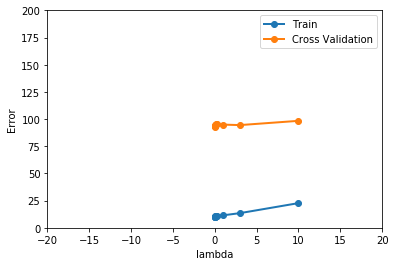

In [201]:
def trainLinearReg(linearRegCostFunction, X, y, lambda_, maxiter=200):
    """
    Trains linear regression using scipy's optimize.minimize.
    Parameters
    ----------
    X : array_like
        The dataset with shape (m x n+1). The bias term is assumed to be concatenated.
    y : array_like
        Function values at each datapoint. A vector of shape (m,).
    lambda_ : float, optional
        The regularization parameter.
    maxiter : int, optional
        Maximum number of iteration for the optimization algorithm.
    Returns
    -------
    theta : array_like
        The parameters for linear regression. This is a vector of shape (n+1,).
    """
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': maxiter}

    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x

def validationCurve(X, y, Xval, yval):
    
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i in range(len(lambda_vec)):
        res_train = trainLinearReg(linearRegCostFunction, np.concatenate([np.ones((y.size, 1)), X], axis=1), y, lambda_vec[i])
        error_train[i],_ = linearRegCostFunction(np.concatenate( [np.ones((y.size,1)),X ], axis =1), y , res_train,0 )
        error_val[i],_ = linearRegCostFunction(np.concatenate( [np.ones((yval.size,1)),Xval ], axis =1), yval , res_train,0)
    
    return lambda_vec, error_train,error_val



lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_Cv, yval)
pyplot.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('lambda')
pyplot.ylabel('Error')
pyplot.ylim(0,200)
pyplot.xlim(-20,20)

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))



In [200]:
finaltheta = trainLinearReg(linearRegCostFunction, np.concatenate([np.ones((ytest.size, 1)), Xtest], axis=1), ytest, 3, maxiter=200)
errortest,_ = linearRegCostFunction(np.concatenate( [np.ones((ytest.size,1)),Xtest ], axis =1), ytest , finaltheta,0)
print(errortest)

52.71094233742781
